NYC Taxi duration analysis from Kaggle

In [1]:
'''
Part 1.5

In this notebook I:
Clear severe outliers for duration versus distance
'''

'\nPart 1.5\n\nIn this notebook I:\nClear severe outliers for duration versus distance\n'

In [2]:
kaggle_url = 'https://www.kaggle.com/c/nyc-taxi-trip-duration'

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
txedit = pd.read_csv('edit_1.csv',index_col=0)

txedit.head()

C:\Users\liamk\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance
0,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,1.502172
1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,1.808660
2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,6.379687
3,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,1.483632
4,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,1.187038


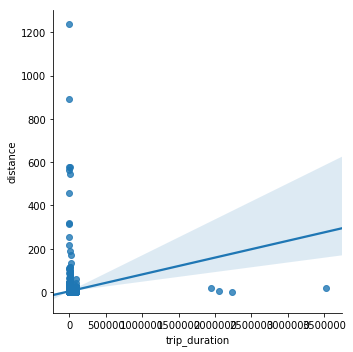

In [6]:
sns.lmplot(x='trip_duration',y='distance',data=txedit)

In [20]:
# find severe outliers in distance

txsort = txedit['trip_duration'].sort_values(ascending=False)

txsort = txsort[:4]

txsort

978383    3526282
924150    2227612
680594    2049578
355003    1939736
Name: trip_duration, dtype: int64

In [21]:
txsort.index

Int64Index([978383, 924150, 680594, 355003], dtype='int64')

In [22]:
# drop severe outliers in trip duration

txedit = txedit.drop(index=txsort.index)

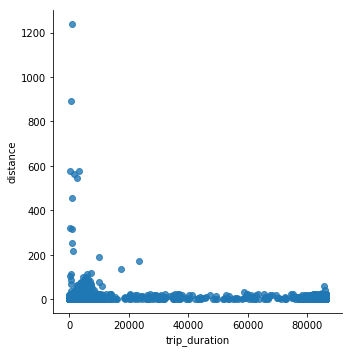

In [23]:
sns.lmplot(x='trip_duration',y='distance',data=txedit,fit_reg=False)

In [29]:
txsort2 = txedit['distance'].sort_values(ascending=False)

txsort2.head(25)

184925     1240.510256
974378      891.663777
910072      578.579744
1100676     575.600259
923793      563.028024
397526      546.924490
1013474     456.364941
377068      320.445202
275644      314.260625
644165      253.987879
1060807     215.511294
1301396     191.818021
114376      173.237313
1416336     135.448030
14502       116.614330
978647      115.120552
283102      112.829898
595540      105.023359
512980      101.858199
823541       97.824850
396966       93.384899
1085898      90.726581
1359910      85.972969
506284       83.662681
246942       83.199129
Name: distance, dtype: float64

In [30]:
txsort2 = txsort2[txsort2 > 100]

txsort2

184925     1240.510256
974378      891.663777
910072      578.579744
1100676     575.600259
923793      563.028024
397526      546.924490
1013474     456.364941
377068      320.445202
275644      314.260625
644165      253.987879
1060807     215.511294
1301396     191.818021
114376      173.237313
1416336     135.448030
14502       116.614330
978647      115.120552
283102      112.829898
595540      105.023359
512980      101.858199
Name: distance, dtype: float64

In [31]:
txedit = txedit.drop(index=txsort2.index)

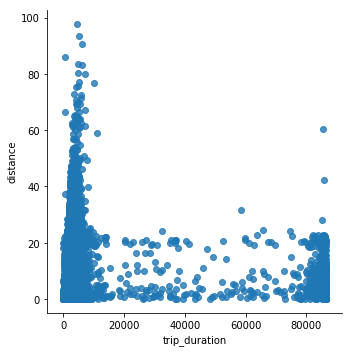

In [35]:
sns.lmplot(x='trip_duration',y='distance',data=txedit,fit_reg=False)

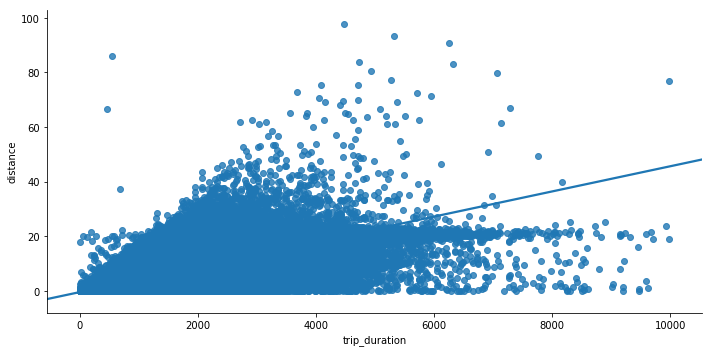

In [37]:
# ploting distance vs trip duration with filter

sns.lmplot(x='trip_duration',y='distance',data=txedit[(txedit['trip_duration'] < 10000)],fit_reg=True,aspect=2)

In [38]:
# save edit_1_v2 copy to save new dataset with some outliers removed
'''
txedit.to_csv('edit_1_v2.csv')
'''

In [39]:
# continue to part 2